In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import random

2022-08-18 19:54:39.636553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-18 19:54:39.636646: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
DIRECTORY = r"/home/user/ML/Deep Learning/CNN/Potato/PlantVillage"

CATEGORIES = ["Potato___Early_blight","Potato___healthy","Potato___Late_blight"]

IMAGE_SIZE = 100
BATCH_SIZE = 32

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen = train_datagen.flow_from_directory(
    DIRECTORY,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset = 'training'
)

test_datagen = test_datagen.flow_from_directory(
    DIRECTORY,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

Found 1937 images belonging to 3 classes.
Found 215 images belonging to 3 classes.


In [4]:
train_datagen.class_indices


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential()

# Layer One 
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Flatten())
model.add(Dense(3,activation='softmax'))

2022-08-18 19:54:43.696150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-18 19:54:43.696565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-08-18 19:54:43.696650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-08-18 19:54:43.696714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: lib

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagen,epochs=50,validation_data=test_datagen)

model.summary()

Epoch 1/50
61/61 [==============================] - 12s 188ms/step - loss: 0.8716 - accuracy: 0.6892 - val_loss: 0.4358 - val_accuracy: 0.8744
Epoch 2/50
61/61 [==============================] - 12s 189ms/step - loss: 0.3419 - accuracy: 0.8725 - val_loss: 0.2469 - val_accuracy: 0.9070
Epoch 3/50
61/61 [==============================] - 12s 201ms/step - loss: 0.2652 - accuracy: 0.9004 - val_loss: 1.0624 - val_accuracy: 0.6233
Epoch 4/50
61/61 [==============================] - 11s 171ms/step - loss: 0.2262 - accuracy: 0.9153 - val_loss: 0.6074 - val_accuracy: 0.7349
Epoch 5/50
61/61 [==============================] - 11s 180ms/step - loss: 0.1781 - accuracy: 0.9339 - val_loss: 0.6338 - val_accuracy: 0.7488
Epoch 6/50
61/61 [==============================] - 13s 209ms/step - loss: 0.1432 - accuracy: 0.9510 - val_loss: 0.2229 - val_accuracy: 0.9070
Epoch 7/50
61/61 [==============================] - 10s 161ms/step - loss: 0.1757 - accuracy: 0.9319 - val_loss: 0.1672 - val_accuracy: 0.9302

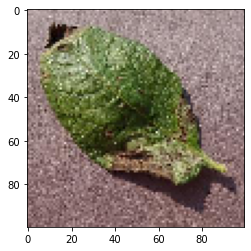

In [7]:
def get_result(index):
    for val in train_datagen.class_indices:
        if train_datagen.class_indices[val] == index:
            val = val.split("___")
            return val[1]
        


from keras.preprocessing import image
# path = "/home/user/ML/Deep Learning/CNN/Covid/test/net"
path = r"/home/user/ML/Deep Learning/CNN/Potato/Test"
img = path + "/light.JPG"
try:
    
    img_pred = tf.keras.utils.load_img(img,target_size=(IMAGE_SIZE,IMAGE_SIZE))
    img_pred = tf.keras.utils.img_to_array(img_pred)
    img_pred = img_pred / 255
    plt.imshow(img_pred)
    img_pred = np.expand_dims(img_pred, axis=0)
except:
    print("file not found!")


In [8]:
result = model.predict(img_pred)
index = np.argmax(result)
print("Index -> " , index)
print("Result -> " ,get_result(index))

1/1 [==============================] - 0s 56ms/step
Index ->  1
Result ->  Late_blight
